In [20]:
import pandas as pd
from pandas_datareader import data
import itertools
import numpy as np
import matplotlib.pyplot as plt 

from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data (1).csv


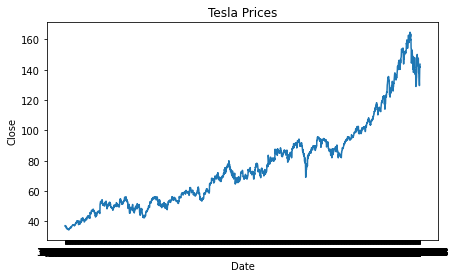

In [21]:
df = pd.read_csv("Stock Price Data.csv")
plt.figure(figsize=(7,4))
plt.title('Tesla Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df["Date"], df["Close"])

In [22]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation,concatenate
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.losses import MSE                  
from keras.optimizers import Adam              
from keras.activations import relu  

In [23]:
df = df['Open'].values
print(df.shape[0])

2265


In [24]:
train_data, test_data = df[0:int(len(df)*124/151)], df[int(len(df)*124/151):]
len(train_data), len(test_data)

(1860, 405)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1))

In [26]:
test_data = scaler.transform(test_data.reshape(-1, 1))

In [27]:
def create_dataset(df,n):
    x = []
    y = []
  
    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [28]:
x_train, y_train = create_dataset(train_data,50)
x_test, y_test = create_dataset(test_data,50)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
print('Training data shape',x_train.shape)
print('Test data shape',x_test.shape)

Training data shape (1810, 50, 1)
Test data shape (355, 50, 1)


In [30]:
model = Sequential()

model.add(LSTM(units=96, 
               return_sequences=True,
               input_shape=(x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96))

model.add(Dropout(0.2))

model.add(Dense(units=1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                7

In [32]:
model.compile(loss=MSE, optimizer=Adam())
history = model.fit(x_train,y_train,batch_size=32,epochs=30,verbose=1)

Epoch 1/30
57/57 [==============================] - 8s 141ms/step - loss: 0.0205
Epoch 2/30
57/57 [==============================] - 8s 139ms/step - loss: 0.0036
Epoch 3/30
57/57 [==============================] - 8s 140ms/step - loss: 0.0040
Epoch 4/30
57/57 [==============================] - 8s 143ms/step - loss: 0.0033
Epoch 5/30
57/57 [==============================] - 8s 148ms/step - loss: 0.0029
Epoch 6/30
57/57 [==============================] - 8s 146ms/step - loss: 0.0037
Epoch 7/30
57/57 [==============================] - 8s 147ms/step - loss: 0.0025
Epoch 8/30
57/57 [==============================] - 8s 145ms/step - loss: 0.0029
Epoch 9/30
57/57 [==============================] - 8s 147ms/step - loss: 0.0025
Epoch 10/30
57/57 [==============================] - 8s 145ms/step - loss: 0.0023
Epoch 11/30
57/57 [==============================] - 8s 145ms/step - loss: 0.0025
Epoch 12/30
57/57 [==============================] - 8s 146ms/step - loss: 0.0023
Epoch 13/30
57/57 [======

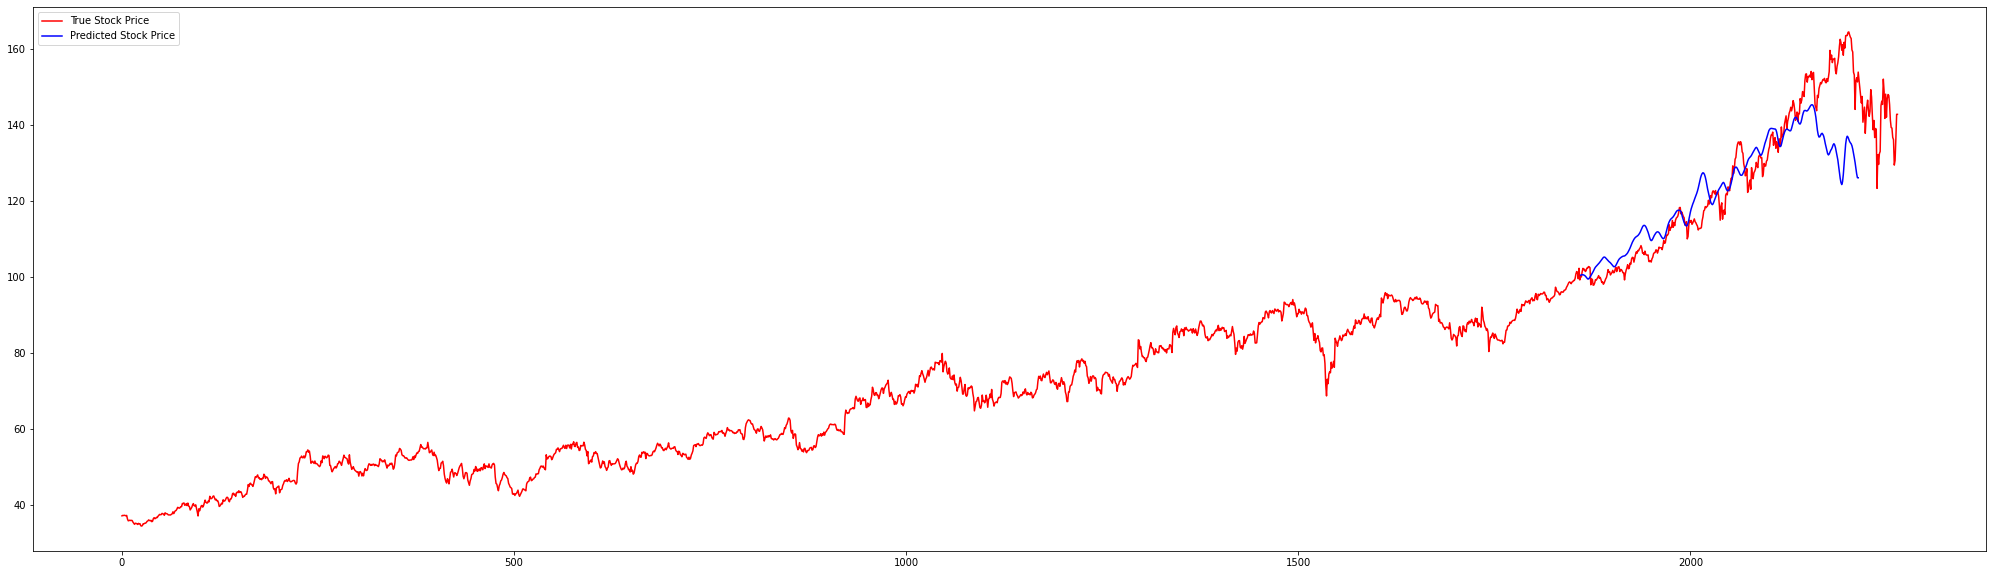

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(35,10))
plt.plot(df, color='red',  label="True Stock Price",)
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Stock Price')
plt.legend()

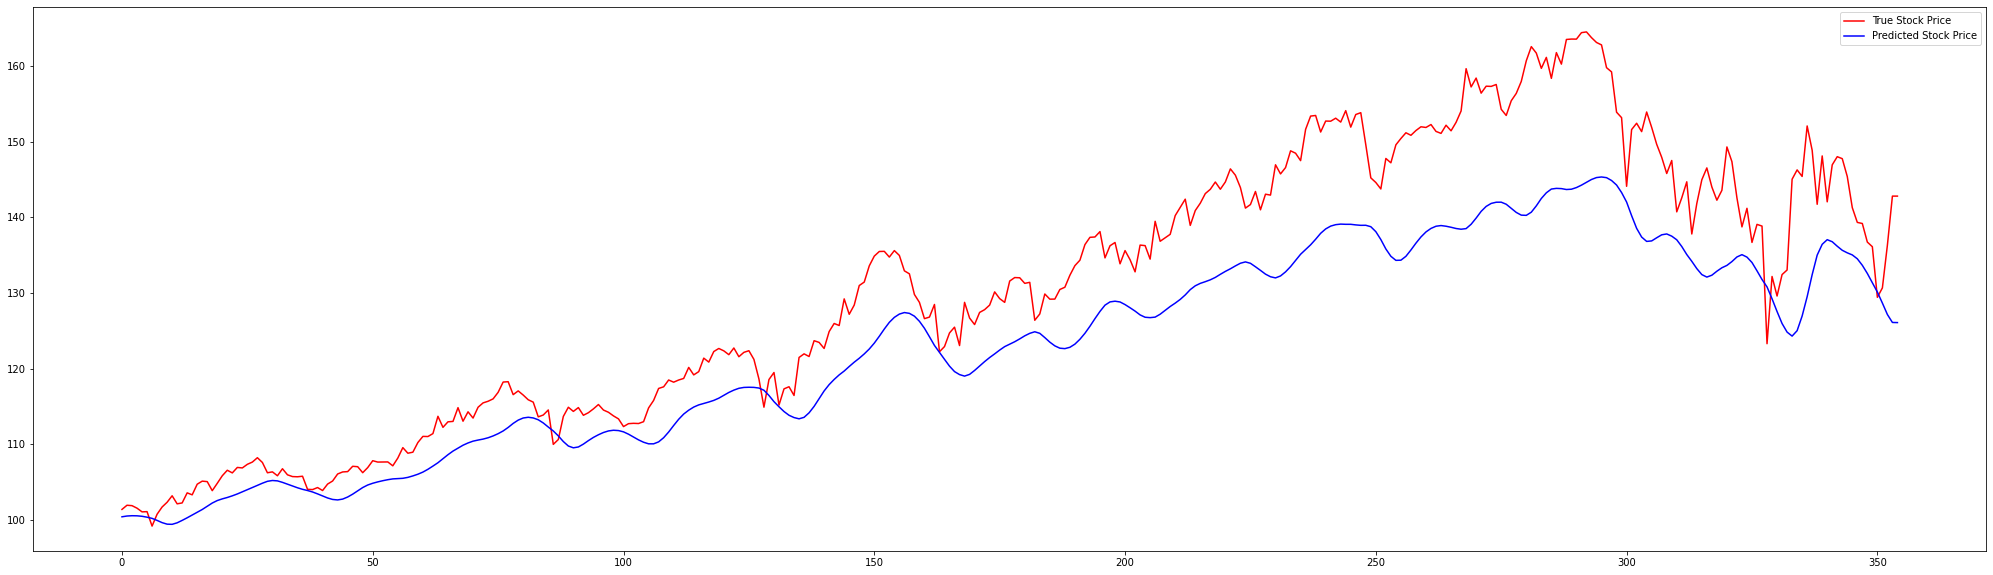

In [34]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(35,10))
ax.plot(y_test_scaled, color='red', label='True Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.legend()

In [35]:
from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv('Sample Submission.csv')


Saving Sample Submission.csv to Sample Submission.csv


In [37]:
df1['Close'] = np.array(predictions)
df1.to_csv('LSTM.csv', index=False)